[![Open In Colab](https://colab.research.google.com/assets/colab-badge.svg)](https://colab.research.google.com/github/romerogroup/Jupyter_notebooks/blob/master/Thermal_Properties/1D_Phonons/1D_Phonon.ipynb)

## Elastic Vibrations in a Diatomic 1D Lattice

In the case of two sepecies that occupy alternating sites of a 1D lattice, the cell that contains the neighborhood of either atom is no longer periodic. Likewise the independent motion of either atom does not represent the motion of the entire system. The new unit cell must be defined to enclose the two species. One approach takes the centers of two of the nearest atoms of the same species to be the endpoints of the cell, defining the distance between the two as the lattice constant . In this way, the cell completely encloses one atom from one of the species, and it encloses two half atoms of the other species. In total that is two atoms per unit cell comprised of two different species, which validates the defintion of the new unit cell.

![1D_Diatomic_Lattice](1D_Diatomic_Lattice.png)

Now an equation of motion for each species can be written independently following following the same procedure as for the monoatomic system.

\begin{equation}
M_1\frac{du_n}{dt^2} = - C ( 2u_n - v_n - v_{n-1} ) \\
M_2\frac{dv_n}{dt^2} = - C ( 2v_n - u_n - u_{n+1} )
\end{equation}

As before a reasonable ansatz for either equation is an oscillatory function. Supposing that the general solutions $u_n = ue^{i( kna - \omega t )}$ and $v_n = ve^{i( kna - \omega t )}$, substitution into the equations of motion gives

\begin{equation}
-\omega^2 M_1 ue^{i( kna - \omega t )} = -C ( 2ue^{i( kna - \omega t )} - ve^{i( kna - \omega t )} -  ve^{i(k(n-1)a - \omega t )} ) \\
-\omega^2 M_2 ve^{i( kna - \omega t )} = -C ( 2ve^{i( kna - \omega t )} - ue^{i( kna - \omega t )} - ue^{i(k(n+1)a - \omega t )} ).
\end{equation}

In both equations, $e^{i( kna - \omega t )}$ is a common factor that can be eliminated, yielding

\begin{equation}
-\omega^2 M_1 u = -C[ 2u + ( 1 + e^{-ika} ) v ] \\
-\omega^2 M_2 v = -C[ 2v + ( 1 + e^{ika} ) u ].
\end{equation}

Grouping the $u$ and $v$ terms motivates the subsequent solution path.

\begin{equation}
( \omega^2 M_1 - 2C )u + ( 1 + e^{-ika} )Cv \\
( 1 + e^{ika} )Cu + ( \omega^2 M_2 - 2C )v.
\end{equation}

The motion of each species is coupled to the other through the action of the spring. Therefore, the system of equations must be solved silmutaneously. Casting the expressions into a matrix equation, there are simultaneous unique solutions for u and v when the matrix determinant is zero.

\begin{equation}
\left| \begin{array}{cc} \omega^2 M_1 - 2C & ( 1 + e^{-ika} )C \\ ( 1 + e^{ika} )C & \omega^2 M_2 - 2C \end{array} \right| = 0
\end{equation}

Therefore, the characteristic polynomial for the system is

\begin{equation}
(\omega^2 M_1 - 2C)(\omega^2 M_2 - 2C) - C^2(1 + e^{-ika})(1 + e^{ika}) = 0.
\end{equation}

which simplifies giving a quadratic equation in $\omega^2$.

\begin{equation}
M_1M_2\omega^4 - 2C\omega^2(M_1 + M_2) + 2C^2(1- coska) = 0
\end{equation}

The roots are

\begin{equation}
\omega^2 = \frac{2C}{M_1M_2}\left[(M_1 + M_2) \pm \sqrt{(M_1+M_2)^2 + 2M_1M_2(1-coska)}\right]
\end{equation}

which may be simplified further as

\begin{equation}
\omega = \sqrt{\frac{2C}{M_1M_2}\left(M_1 + M_2 \pm \sqrt{(M_1+M_2)^2 -4M_1M_2\sin^2\frac{ka}{2}} \right)}.
\end{equation}

Plotting provides the dispersion relation between the energy $\hbar\omega$ and the wavenumber $k$.

<IPython.core.display.Javascript object>


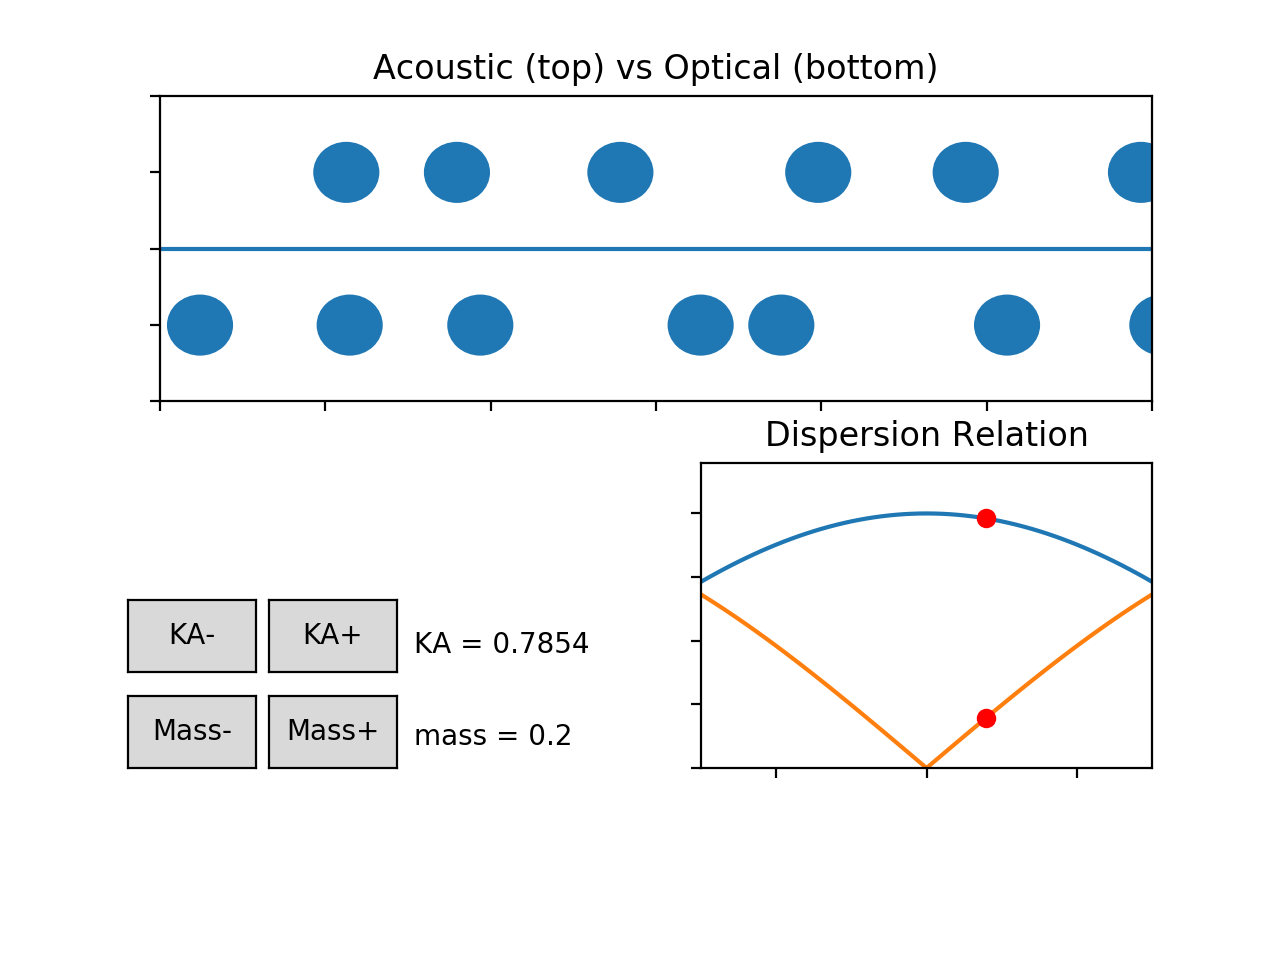

In [9]:
%matplotlib notebook
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import animation
from IPython.display import HTML
import ipywidgets as widgets
from matplotlib.widgets import Button
from matplotlib.widgets import CheckButtons
from ipywidgets import interact, interactive, fixed, interact_manual

fig = plt.figure()
ax = fig.add_subplot(211)
ax.set_yticklabels([])
ax.set_xticklabels([])
plt.xlim(-3, 3)
plt.ylim(-1, 1)
plt.title("Acoustic (top) vs Optical (bottom)")
C = 1
M = 1
mass1 = 0.2

fig.subplots_adjust(bottom=0.2, top=0.90)

axprev = fig.add_axes([0.1, 0.3, 0.1, 0.075])
axnext = fig.add_axes([0.21, 0.3, 0.1, 0.075])
bnext = Button(axnext, 'KA+')
bprev = Button(axprev, 'KA-')

axprevmass = fig.add_axes([0.1, 0.2, 0.1, 0.075])
axnextmass = fig.add_axes([0.21, 0.2, 0.1, 0.075])
bnextmass = Button(axnextmass, 'Mass+')
bprevmass = Button(axprevmass, 'Mass-')

global k
k = np.pi/4

global mass2
mass2 = 0.2

ax3 = fig.add_axes([0.32, 0.1, 0.18, 0.275])
ax3.tick_params("both", color='w')
ax3.spines["left"].set_color("w")
ax3.spines["right"].set_color("w")
ax3.spines["top"].set_color("w")
ax3.spines["bottom"].set_color("w")
ax3.yaxis.label.set_color('w')
ax3.xaxis.label.set_color('w')
ax3.set_yticklabels([])
ax3.set_xticklabels([])

ax3.text(x=0.02, y=0.8, s="KA = " + str(np.round(k, 4)))
ax3.text(x=0.02, y=0.45, s="mass = " + str(np.round(mass2, 4)))



def F(n,k,t):
    term1 = (C*(mass1+mass2))/(mass1*mass2)
    term2 = ((mass1 + mass2) ** 2)/((mass1**2)*(mass2**2))
    term3 = (4*(np.sin(k/2)**2))/(mass1*mass2)
    w = np.sqrt(term1 + C*np.sqrt(term2 - term3))
    return n + 1/4*(np.cos(k*n-w*t))

def F2(n,k,t):
    term1 = (C * (mass1 + mass2)) / (mass1 * mass2)
    term2 = ((mass1 + mass2) ** 2) / ((mass1 ** 2) * (mass2 ** 2))
    term3 = (4 * (np.sin(k / 2) ** 2)) / (mass1 * mass2)
    w = np.sqrt(term1 + C * np.sqrt(term2 - term3))
    first = C/((C*2)-((w**2)*mass2))
    second = np.cos(k)*np.cos(k*n-w*t)
    third = np.sin(k)*np.sin(k*n-w*t)
    return n + 1/4*(first*(1+second+third))

def F3(n,k,t):
    term1 = (C * (mass1 + mass2)) / (mass1 * mass2)
    term2 = ((mass1 + mass2) ** 2) / ((mass1 ** 2) * (mass2 ** 2))
    term3 = (4 * (np.sin(k / 2) ** 2)) / (mass1 * mass2)
    w = np.sqrt(term1 - C * np.sqrt(term2 - term3))
    first = C/((C*2)-((w**2)*mass2))
    second = np.cos(k)*np.cos(k*n-w*t)
    third = np.sin(k)*np.sin(k*n-w*t)
    return n + 1/4*(first*(1+second-third))

patch1 = plt.Circle((0, 0.5), 0.2)
patch2 = plt.Circle((-1, 0.5), mass2)
patch3 = plt.Circle((1, 0.5), mass2)
patch4 = plt.Circle((-2, 0.5), 0.2)
patch5 = plt.Circle((2, 0.5), 0.2)
patch6 = plt.Circle((-3, 0.5), mass2)
patch7 = plt.Circle((3, 0.5), mass2)

patch8 = plt.Circle((0, -0.5), 0.2)
patch9 = plt.Circle((-1, -0.5), mass2)
patch10 = plt.Circle((1, -0.5), mass2)
patch11 = plt.Circle((-2, -0.5), 0.2)
patch12 = plt.Circle((2, -0.5), 0.2)
patch13 = plt.Circle((-3, -0.5), mass2)
patch14 = plt.Circle((3, -0.5), mass2)


ax2 = fig.add_subplot(224)
ax2.set_title("Dispersion Relation")
ax2.set_yticklabels([])
ax2.set_xticklabels([])
plt.xlim(-3, 3)
plt.ylim(0, 1.2)
xvalues = np.arange(-3.2, 3.2, 0.1)
term1 = (C * (mass1 + mass2)) / (mass1 * mass2)
term2 = ((mass1 + mass2) ** 2) / ((mass1 ** 2) * (mass2 ** 2))
term3 = (4 * (np.sin(xvalues / 2) ** 2)) / (mass1 * mass2)
w = np.sqrt(term1 + C * np.sqrt(term2 - term3))
w2 = np.sqrt(term1 - C * np.sqrt(term2 - term3))
yvalues = w/np.sqrt(2*C*((1/mass1)+(1/mass2)))
yvalues2 = w2/np.sqrt(2*C*((1/mass1)+(1/mass2)))
ax2.plot(xvalues, yvalues)
ax2.plot(xvalues, yvalues2)

term3k = (4 * (np.sin(k / 2) ** 2)) / (mass1 * mass2)
wk = np.sqrt(term1 + C * np.sqrt(term2 - term3k))
wk2 = np.sqrt(term1 - C * np.sqrt(term2 - term3k))
yvaluek = wk / np.sqrt(2 * C * ((1 / mass1) + (1 / mass2)))
yvalue2k = wk2 / np.sqrt(2 * C * ((1 / mass1) + (1 / mass2)))
ax2.plot(k, yvaluek, 'ro')
ax2.plot(k, yvalue2k, 'ro')

ax.plot(xvalues, xvalues-xvalues)

def init():
    patch1.center = (0,0.5)
    patch2.center = (-1,0.5)
    patch3.center = (1,0.5)
    patch4.center = (-2,0.5)
    patch5.center = (2,0.5)
    patch6.center = (-3,0.5)
    patch7.center = (3,0.5)
    ax.add_patch(patch1)
    ax.add_patch(patch2)
    ax.add_patch(patch3)
    ax.add_patch(patch4)
    ax.add_patch(patch5)
    ax.add_patch(patch6)
    ax.add_patch(patch7)

    patch8.center = (0, -0.5)
    patch9.center = (-1, -0.5)
    patch10.center = (1, -0.5)
    patch11.center = (-2, -0.5)
    patch12.center = (2, -0.5)
    patch13.center = (-3, -0.5)
    patch14.center = (3, -0.5)
    ax.add_patch(patch8)
    ax.add_patch(patch9)
    ax.add_patch(patch10)
    ax.add_patch(patch11)
    ax.add_patch(patch12)
    ax.add_patch(patch13)
    ax.add_patch(patch14)
    return patch1, patch2, patch3, patch4, patch5, patch6, patch7, patch8, patch9, patch10, patch11, patch12, patch13, patch14

#plt.xlim(-3, 3)
#plt.ylim(-2.25, 2.25)

def animate(t):
    patch2.radius = mass2
    patch3.radius = mass2
    patch6.radius = mass2
    patch7.radius = mass2
    patch1.center = (F(0, k, t), 0.5)
    patch2.center = (F2(-1, k, t), 0.5)
    patch3.center = (F2(1, k, t), 0.5)
    patch4.center = (F(-2, k, t), 0.5)
    patch5.center = (F(2, k, t), 0.5)
    patch6.center = (F2(-3, k, t), 0.5)
    patch7.center = (F2(3, k, t), 0.5)

    patch9.radius = mass2
    patch10.radius = mass2
    patch13.radius = mass2
    patch14.radius = mass2
    patch8.center = (F3(0, k, t), -0.5)
    patch9.center = (F(-1, k, t), -0.5)
    patch10.center = (F(1, k, t), -0.5)
    patch11.center = (F3(-2, k, t), -0.5)
    patch12.center = (F3(2, k, t), -0.5)
    patch13.center = (F(-3, k, t), -0.5)
    patch14.center = (F(3, k, t), -0.5)
    return (patch1, patch2, patch3, patch4, patch5, patch6, patch7, patch8, patch9, patch10, patch11, patch12, patch13, patch14)

class Index():

    def next(self, event):
        global k
        #plt.cla()
        ax2.cla()
        ax3.cla()

        k += np.pi/6

        ax3.set_yticklabels([])
        ax3.set_xticklabels([])

        ax3.text(x=0.02, y=0.8, s="KA = " + str(np.round(k, 4)))
        ax3.text(x=0.02, y=0.45, s="mass = " + str(np.round(mass2, 4)))

        ax2.set_yticklabels([])
        ax2.set_xticklabels([])
        ax2.set_title("Dispersion Relation")

        plt.xlim(-3, 3)
        plt.ylim(0, 1.2)
        xvalues = np.arange(-3.2, 3.2, 0.1)
        term1 = (C * (mass1 + mass2)) / (mass1 * mass2)
        term2 = ((mass1 + mass2) ** 2) / ((mass1 ** 2) * (mass2 ** 2))
        term3 = (4 * (np.sin(xvalues / 2) ** 2)) / (mass1 * mass2)
        w = np.sqrt(term1 + C * np.sqrt(term2 - term3))
        w2 = np.sqrt(term1 - C * np.sqrt(term2 - term3))
        yvalues = w / np.sqrt(2 * C * ((1 / mass1) + (1 / mass2)))
        yvalues2 = w2 / np.sqrt(2 * C * ((1 / mass1) + (1 / mass2)))
        ax2.plot(xvalues, yvalues)
        ax2.plot(xvalues, yvalues2)

        term3k = (4 * (np.sin(k / 2) ** 2)) / (mass1 * mass2)
        wk = np.sqrt(term1 + C * np.sqrt(term2 - term3k))
        wk2 = np.sqrt(term1 - C * np.sqrt(term2 - term3k))
        yvaluek = wk / np.sqrt(2 * C * ((1 / mass1) + (1 / mass2)))
        yvalue2k = wk2 / np.sqrt(2 * C * ((1 / mass1) + (1 / mass2)))
        ax2.plot(k, yvaluek, 'ro')
        ax2.plot(k, yvalue2k, 'ro')
        
    def prev(self, event):
        global k
        #plt.cla()
        ax2.cla()
        ax3.cla()

        k -= np.pi/6

        ax3.set_yticklabels([])
        ax3.set_xticklabels([])

        ax3.text(x=0.02, y=0.8, s="KA = " + str(np.round(k, 4)))
        ax3.text(x=0.02, y=0.45, s="mass = " + str(np.round(mass2, 4)))

        ax2.set_yticklabels([])
        ax2.set_xticklabels([])
        ax2.set_title("Dispersion Relation")
        
        plt.xlim(-3, 3)
        plt.ylim(0, 1.2)
        xvalues = np.arange(-3.2, 3.2, 0.1)
        term1 = (C * (mass1 + mass2)) / (mass1 * mass2)
        term2 = ((mass1 + mass2) ** 2) / ((mass1 ** 2) * (mass2 ** 2))
        term3 = (4 * (np.sin(xvalues / 2) ** 2)) / (mass1 * mass2)
        w = np.sqrt(term1 + C * np.sqrt(term2 - term3))
        w2 = np.sqrt(term1 - C * np.sqrt(term2 - term3))
        yvalues = w / np.sqrt(2 * C * ((1 / mass1) + (1 / mass2)))
        yvalues2 = w2 / np.sqrt(2 * C * ((1 / mass1) + (1 / mass2)))
        ax2.plot(xvalues, yvalues)
        ax2.plot(xvalues, yvalues2)

        term3k = (4 * (np.sin(k / 2) ** 2)) / (mass1 * mass2)
        wk = np.sqrt(term1 + C * np.sqrt(term2 - term3k))
        wk2 = np.sqrt(term1 - C * np.sqrt(term2 - term3k))
        yvaluek = wk / np.sqrt(2 * C * ((1 / mass1) + (1 / mass2)))
        yvalue2k = wk2 / np.sqrt(2 * C * ((1 / mass1) + (1 / mass2)))
        ax2.plot(k, yvaluek, 'ro')
        ax2.plot(k, yvalue2k, 'ro')


    def nextmass(self, event):
        global mass2
        #plt.cla()
        ax2.cla()
        ax3.cla()

        mass2 += 0.05

        ax3.set_yticklabels([])
        ax3.set_xticklabels([])

        ax3.text(x=0.02, y=0.8, s="KA = " + str(np.round(k, 4)))
        ax3.text(x=0.02, y=0.45, s="mass = " + str(np.round(mass2, 4)))

        ax2.set_yticklabels([])
        ax2.set_xticklabels([])
        ax2.set_title("Dispersion Relation")

        plt.xlim(-3, 3)
        plt.ylim(0, 1.2)
        xvalues = np.arange(-3.2, 3.2, 0.1)
        term1 = (C * (mass1 + mass2)) / (mass1 * mass2)
        term2 = ((mass1 + mass2) ** 2) / ((mass1 ** 2) * (mass2 ** 2))
        term3 = (4 * (np.sin(xvalues / 2) ** 2)) / (mass1 * mass2)
        w = np.sqrt(term1 + C * np.sqrt(term2 - term3))
        w2 = np.sqrt(term1 - C * np.sqrt(term2 - term3))
        yvalues = w / np.sqrt(2 * C * ((1 / mass1) + (1 / mass2)))
        yvalues2 = w2 / np.sqrt(2 * C * ((1 / mass1) + (1 / mass2)))
        ax2.plot(xvalues, yvalues)
        ax2.plot(xvalues, yvalues2)

        term3k = (4 * (np.sin(k / 2) ** 2)) / (mass1 * mass2)
        wk = np.sqrt(term1 + C * np.sqrt(term2 - term3k))
        wk2 = np.sqrt(term1 - C * np.sqrt(term2 - term3k))
        yvaluek = wk / np.sqrt(2 * C * ((1 / mass1) + (1 / mass2)))
        yvalue2k = wk2 / np.sqrt(2 * C * ((1 / mass1) + (1 / mass2)))
        ax2.plot(k, yvaluek, 'ro')
        ax2.plot(k, yvalue2k, 'ro')
        
    def prevmass(self, event):
        global mass2
        #plt.cla()
        ax2.cla()
        ax3.cla()

        mass2 -= 0.05

        ax3.set_yticklabels([])
        ax3.set_xticklabels([])

        ax3.text(x=0.02, y=0.8, s="KA = " + str(np.round(k, 4)))
        ax3.text(x=0.02, y=0.45, s="mass = " + str(np.round(mass2, 4)))

        ax2.set_yticklabels([])
        ax2.set_xticklabels([])
        ax2.set_title("Dispersion Relation")

        plt.xlim(-3, 3)
        plt.ylim(0, 1.2)
        xvalues = np.arange(-3.2, 3.2, 0.1)
        term1 = (C * (mass1 + mass2)) / (mass1 * mass2)
        term2 = ((mass1 + mass2) ** 2) / ((mass1 ** 2) * (mass2 ** 2))
        term3 = (4 * (np.sin(xvalues / 2) ** 2)) / (mass1 * mass2)
        w = np.sqrt(term1 + C * np.sqrt(term2 - term3))
        w2 = np.sqrt(term1 - C * np.sqrt(term2 - term3))
        yvalues = w / np.sqrt(2 * C * ((1 / mass1) + (1 / mass2)))
        yvalues2 = w2 / np.sqrt(2 * C * ((1 / mass1) + (1 / mass2)))
        ax2.plot(xvalues, yvalues)
        ax2.plot(xvalues, yvalues2)

        term3k = (4 * (np.sin(k / 2) ** 2)) / (mass1 * mass2)
        wk = np.sqrt(term1 + C * np.sqrt(term2 - term3k))
        wk2 = np.sqrt(term1 - C * np.sqrt(term2 - term3k))
        yvaluek = wk / np.sqrt(2 * C * ((1 / mass1) + (1 / mass2)))
        yvalue2k = wk2 / np.sqrt(2 * C * ((1 / mass1) + (1 / mass2)))
        ax2.plot(k, yvaluek, 'ro')
        ax2.plot(k, yvalue2k, 'ro')

callback = Index()
bnext.on_clicked(callback.next)
bprev.on_clicked(callback.prev)
bnextmass.on_clicked(callback.nextmass)
bprevmass.on_clicked(callback.prevmass)

anim = animation.FuncAnimation(fig, animate, init_func=init, frames=58, interval=250, blit=False)